<center> <img src ="https://i.postimg.cc/1X8H7YYt/BITS-Logo.png" width = "400" alt="BITS Pilani Logo" /> </center>

<font color='green'> <h1> <center> Dataframe Merges </center> </h1> </font>

In [1]:
import pandas as pd

pandas provides various facilities for easily combining together Series, DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

# <b> Concat<b>

Several dataframes can be merged together using the concat function.

In [2]:
dict1 = {
            "one" : pd.Series([1, 2, 3, 4]), 
            "two" : pd.Series(['a', 'b', 'c', 'd'])
}

df1 = pd.DataFrame(dict1)
df1

one two
0    1   a
1    2   b
2    3   c
3    4   d

In [3]:
dict2 = {
            "one" : pd.Series([5, 6, 7, 8]), 
            "two" : pd.Series(['x', 'y', 'z', 'a'])
}

df2 = pd.DataFrame(dict2)
df2

one two
0    5   x
1    6   y
2    7   z
3    8   a

In [4]:
frames = [df1, df2]

In [5]:
#by default, it stacks them vertically, meaning it appends the objects one below the other. 
#If the objects have the same column names, it aligns them accordingly. If they have different column names, it fills the missing values with NaN (Not a Number).
pd.concat(frames)

one two
0    1   a
1    2   b
2    3   c
3    4   d
0    5   x
1    6   y
2    7   z
3    8   a

<b> Another Example<b>

In [6]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3]) 

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                    index=[8, 9, 10, 11])

frames = [df1, df2, df3]

result = pd.concat(frames)

In [7]:
result

A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11

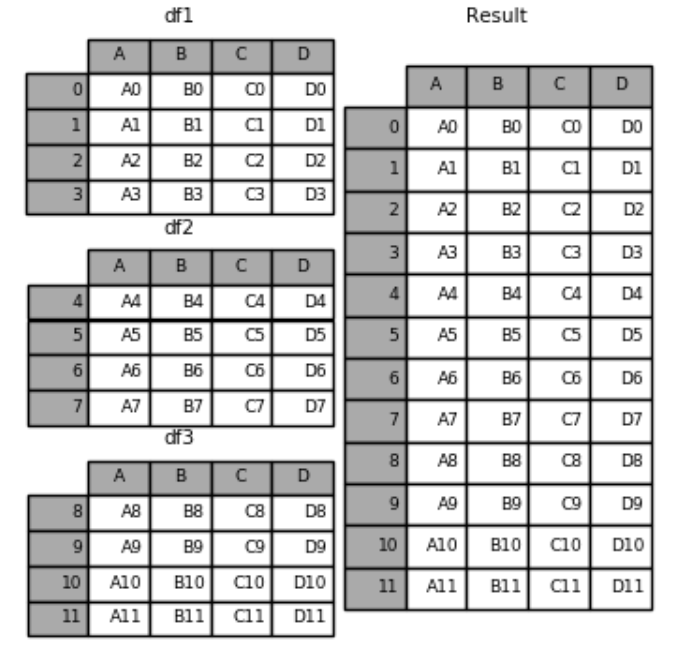

<b> Set logic on the other axes <b>

When gluing together multiple DataFrames, you have a choice of how to handle the other axes (other than the one being concatenated). This can be done in the following three ways: <br>

- Take the union of them all, join='outer'. This is the default option as it results in zero information loss.
- Take the intersection, join='inner'.
- Use a specific index, as passed to the join_axes argument.

First, the default join='outer' behavior:

In [8]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                    index=[2, 3, 6, 7])

result = pd.concat([df1, df4], axis=1, sort=False)
result

A    B    C    D    B    D    F
0   A0   B0   C0   D0  NaN  NaN  NaN
1   A1   B1   C1   D1  NaN  NaN  NaN
2   A2   B2   C2   D2   B2   D2   F2
3   A3   B3   C3   D3   B3   D3   F3
6  NaN  NaN  NaN  NaN   B6   D6   F6
7  NaN  NaN  NaN  NaN   B7   D7   F7

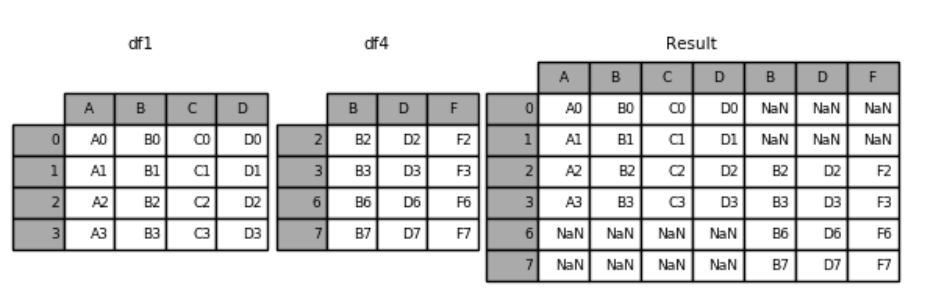

Here is the same thing with join='inner':

In [9]:
result = pd.concat([df1, df4], axis=1, join='inner')
result

A   B   C   D   B   D   F
2  A2  B2  C2  D2  B2  D2  F2
3  A3  B3  C3  D3  B3  D3  F3

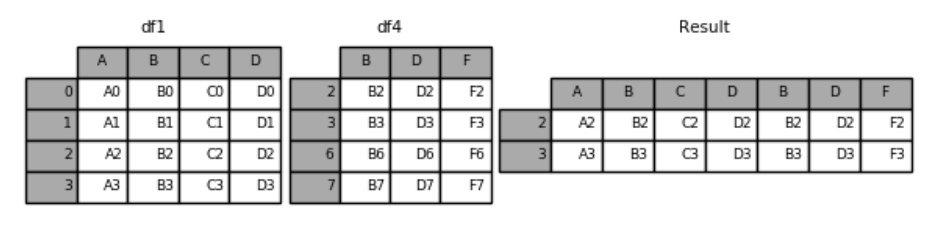

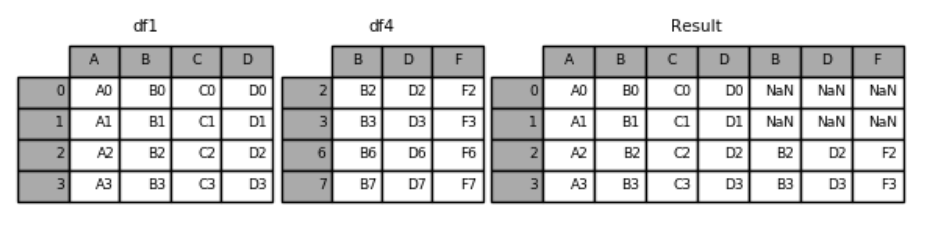

# append - no more in use

A useful shortcut to concat() are the append() instance methods on Series and DataFrame. These methods actually predated concat. They concatenate along axis=0, namely the index:
'particularly handy when you want to add rows to an existing DataFrame or Series'

In [10]:
result = df1.append(df2)
result

AttributeError: 'DataFrame' object has no attribute 'append'

<b>Concatenating with mixed ndims<b>

You can concatenate a mix of Series and DataFrame objects. The Series will be transformed to DataFrame with the column name as the name of the Series.

In [14]:
series1 = pd.Series(['X0', 'X1', 'X2', 'X3'], name='X')
result = pd.concat([df1, series1], axis=1)
result

A   B   C   D   X
0  A0  B0  C0  D0  X0
1  A1  B1  C1  D1  X1
2  A2  B2  C2  D2  X2
3  A3  B3  C3  D3  X3

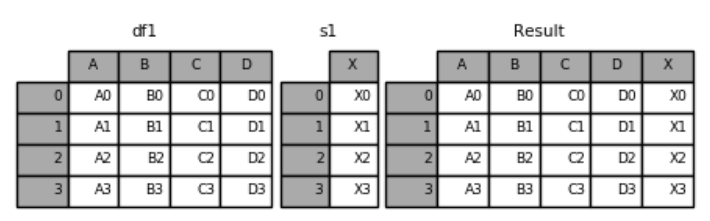

If unnamed Series are passed they will be numbered consecutively.

In [15]:
series2 = pd.Series(['_0', '_1', '_2', '_3'])
result = pd.concat([df1, series2, series2, series2], axis=1)
result

A   B   C   D   0   1   2
0  A0  B0  C0  D0  _0  _0  _0
1  A1  B1  C1  D1  _1  _1  _1
2  A2  B2  C2  D2  _2  _2  _2
3  A3  B3  C3  D3  _3  _3  _3

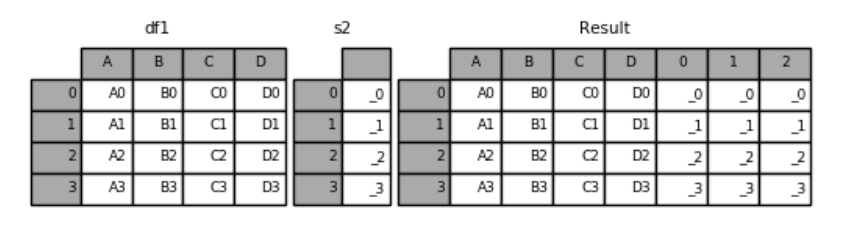

# Database-style DataFrame merging

pandas has full-featured, high performance in-memory join operations idiomatically very similar to relational databases like SQL. These methods perform significantly better (in some cases well over an order of magnitude better) than other open source implementations (like base::merge.data.frame in R). The reason for this is careful algorithmic design and the internal layout of the data in DataFrame.

pandas provides a single function, merge(), as the entry point for all standard database join operations between DataFrame or named Series objects:

pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [21]:
help(pd.merge)

Help on function merge in module pandas.core.reshape.merge:

merge(left: 'DataFrame | Series', right: 'DataFrame | Series', how: 'str' = 'inner', on: 'IndexLabel | None' = None, left_on: 'IndexLabel | None' = None, right_on: 'IndexLabel | None' = None, left_index: 'bool' = False, right_index: 'bool' = False, sort: 'bool' = False, suffixes: 'Suffixes' = ('_x', '_y'), copy: 'bool' = True, indicator: 'bool' = False, validate: 'str | None' = None) -> 'DataFrame'
    Merge DataFrame or named Series objects with a database-style join.
    
    A named Series object is treated as a DataFrame with a single named column.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    When performing a cross merge, no column specifications to merge on are
    allowed.
    
    .. warning::
    
        If both key columns con

The return type will be the same as left. If left is a DataFrame or named Series and right is a subclass of DataFrame, the return type will still be DataFrame.

merge is a function in the pandas namespace, and it is also available as a DataFrame instance method merge(), with the calling DataFrame being implicitly considered the left object in the join.

The related join() method, uses merge internally for the index-on-index (by default) and column(s)-on-index join. If you are joining on index only, you may wish to use DataFrame.join to save yourself some typing.

Experienced users of relational databases like SQL will be familiar with the terminology used to describe join operations between two SQL-table like structures (DataFrame objects). There are several cases to consider which are very important to understand:

- one-to-one joins: for example when joining two DataFrame objects on their indexes (which must contain unique values).
- many-to-one joins: for example when joining an index (unique) to one or more columns in a different DataFrame.
- many-to-many joins: joining columns on columns.

It is worth spending some time understanding the result of the many-to-many join case. In SQL / standard relational algebra, if a key combination appears more than once in both tables, the resulting table will have the Cartesian product of the associated data. Here is a very basic example with one unique key combination:

In [16]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

result = pd.merge(left, right, on='key')
result

key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  B3  C3  D3

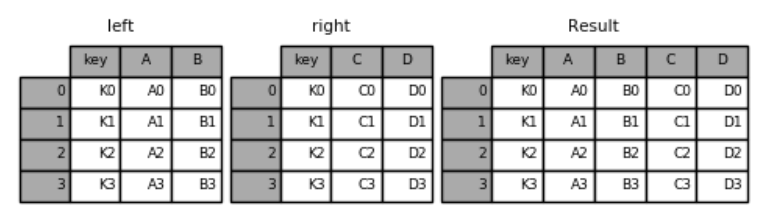

Here is a more complicated example with multiple join keys. Only the keys appearing in left and right are present (the intersection), since how='inner' by default.

In [18]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

result = pd.merge(left, right, on=['key1', 'key2'])
result

key1 key2   A   B   C   D
0   K0   K0  A0  B0  C0  D0
1   K1   K0  A2  B2  C1  D1
2   K1   K0  A2  B2  C2  D2

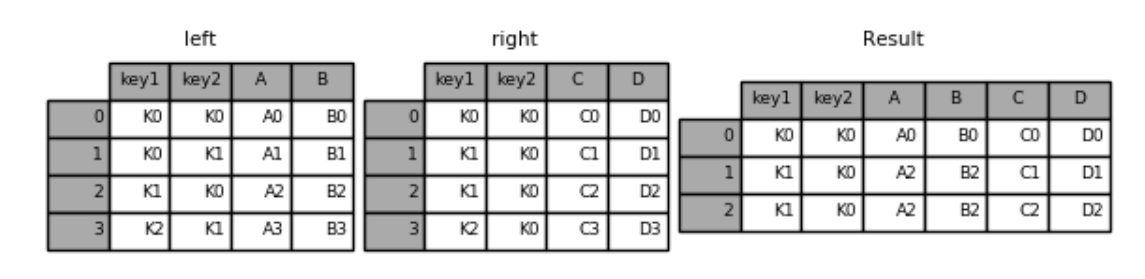

The "how" argument to merge specifies how to determine which keys are to be included in the resulting table. If a key combination does not appear in either the left or right tables, the values in the joined table will be NA. Here is a summary of the how options and their SQL equivalent names:

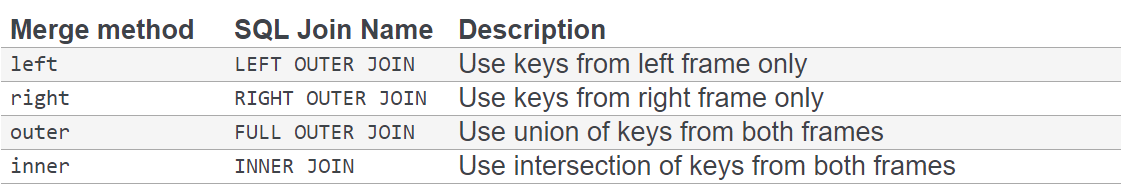

In [19]:
result = pd.merge(left, right, how='left', on=['key1', 'key2'])
result

key1 key2   A   B    C    D
0   K0   K0  A0  B0   C0   D0
1   K0   K1  A1  B1  NaN  NaN
2   K1   K0  A2  B2   C1   D1
3   K1   K0  A2  B2   C2   D2
4   K2   K1  A3  B3  NaN  NaN

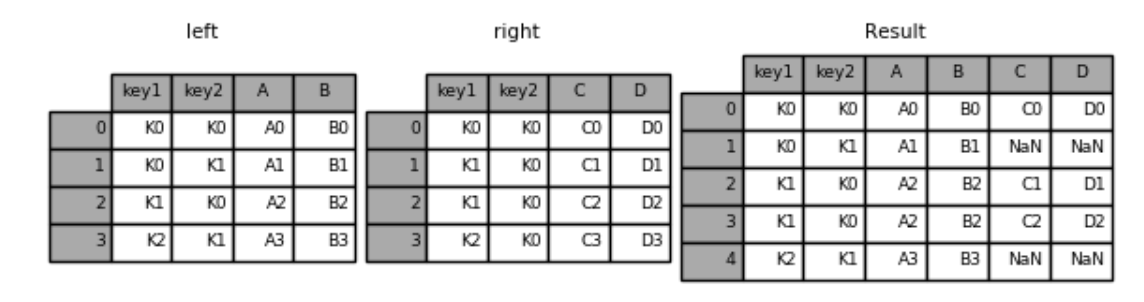

In [20]:
result = pd.merge(left, right, how='right', on=['key1', 'key2'])
result

key1 key2    A    B   C   D
0   K0   K0   A0   B0  C0  D0
1   K1   K0   A2   B2  C1  D1
2   K1   K0   A2   B2  C2  D2
3   K2   K0  NaN  NaN  C3  D3

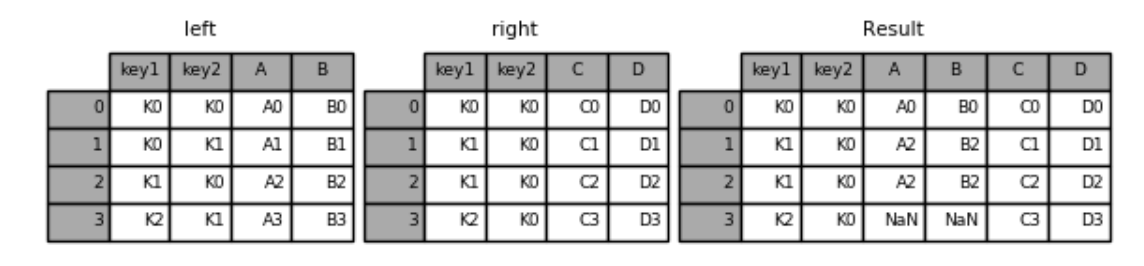

In [21]:
result = pd.merge(left, right, how='outer', on=['key1', 'key2'])
result

key1 key2    A    B    C    D
0   K0   K0   A0   B0   C0   D0
1   K0   K1   A1   B1  NaN  NaN
2   K1   K0   A2   B2   C1   D1
3   K1   K0   A2   B2   C2   D2
4   K2   K1   A3   B3  NaN  NaN
5   K2   K0  NaN  NaN   C3   D3

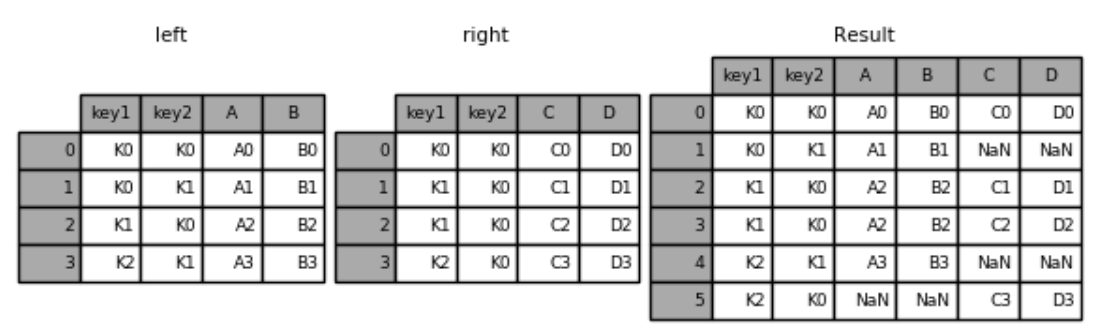

In [22]:
result = pd.merge(left, right, how='inner', on=['key1', 'key2'])
result

key1 key2   A   B   C   D
0   K0   K0  A0  B0  C0  D0
1   K1   K0  A2  B2  C1  D1
2   K1   K0  A2  B2  C2  D2

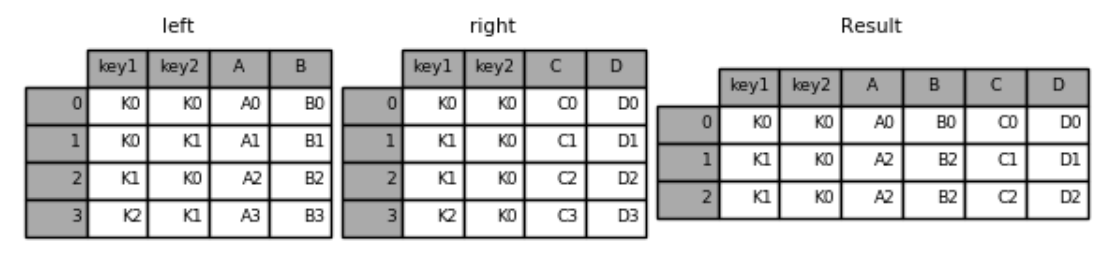

#  Database-style DataFrame indexing

DataFrame.join() is a convenient method for combining the columns of two potentially differently-indexed DataFrames into a single result DataFrame. Here is a very basic example:

In [28]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                    index=['K0', 'K1', 'K2']) 

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                     index=['K0', 'K2', 'K3'])

# left join operation on the DataFrames left and right based on their indices
result = left.join(right)
result

A   B    C    D
K0  A0  B0   C0   D0
K1  A1  B1  NaN  NaN
K2  A2  B2   C2   D2

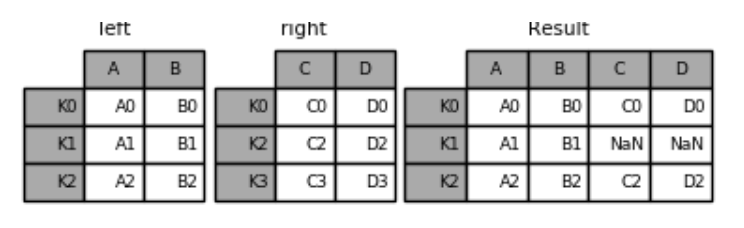

In [29]:
result = left.join(right, how='outer')
result

A    B    C    D
K0   A0   B0   C0   D0
K1   A1   B1  NaN  NaN
K2   A2   B2   C2   D2
K3  NaN  NaN   C3   D3

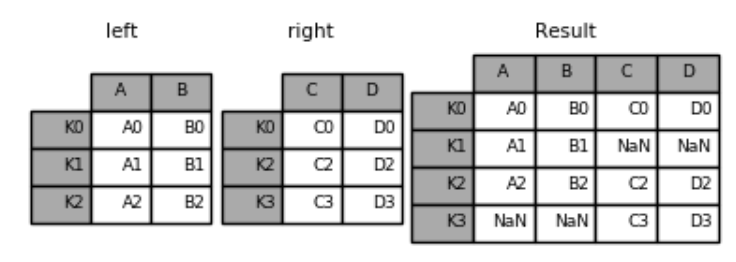

The same as above, but with how='inner'.

In [30]:
result = left.join(right, how='inner')
result

A   B   C   D
K0  A0  B0  C0  D0
K2  A2  B2  C2  D2

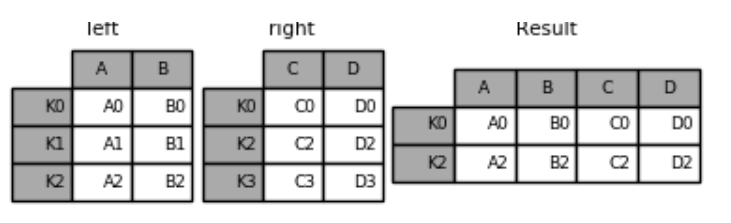